In [148]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False


In [200]:
result=pd.read_csv("C:/Users/acorn/Desktop/SG/FP/result.csv", sep=",", error_bad_lines = False,)

C:\Users\acorn\AppData\Local\Temp\ipykernel_41392\247952864.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  result=pd.read_csv("C:/Users/acorn/Desktop/SG/FP/result.csv", sep=",", error_bad_lines = False,)
b'Skipping line 5134: expected 9 fields, saw 14\nSkipping line 5935: expected 9 fields, saw 37\nSkipping line 6579: expected 9 fields, saw 26\nSkipping line 6721: expected 9 fields, saw 37\nSkipping line 7652: expected 9 fields, saw 13\n'


In [201]:
result.info()
result.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13323 entries, 0 to 13322
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      13323 non-null  object 
 1   ID            13323 non-null  object 
 2   Contents      13323 non-null  object 
 3   Tags          12037 non-null  object 
 4   Tags_sum      13323 non-null  int64  
 5   Tags_count    13323 non-null  float64
 6   Tags_rate     13323 non-null  float64
 7   Likes         13323 non-null  float64
 8   Scaled_likes  13320 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 936.9+ KB


,Category,ID,Contents,Tags,Tags_sum,Tags_count,Tags_rate,Likes,Scaled_likes
0,돈까스,bbo_muksta,내 꿈은 돈모아서 돈까스의집 사는것 한입에 모든걸 뺏겨버린 맛이다 괜히 40년...,"#돈까스의집, #돈까스맛집, #송파맛집, #삼전역맛집, #빵맛집, #돈까스",6,8.0,133.33,3126.0,0.396449
1,돈까스,___foodtour,구름같은 만두를 맛볼 수 있은 곳이에요 너무 맛있어서 음소거 모드로 흡입했어요 ...,"#건대, #성수완당깔끔한, #투어_건대",3,1.0,33.33,3750.0,0.475587
2,돈까스,mukpresident,고치돈 좋아하는 국민들 주목 친애하는 국민여러분 먹통령입니다 오늘 저희가 회담을...,"#사장님돈까스, #먹통령_이대, #이대맛집, #이화여대맛집, #고치돈맛집, #돈까스...",8,10.0,125.00,2761.0,0.350159
3,돈까스,fooseidon_,다들주목 서울 3대 돈까스 오픈부터 엄청나게 웨이팅이 있는곳벼루다 드뎌...,"#ㅂㅜㄱㅊㅓㄴ, #ㅂㅜㄱㅊㅓㄴㄷㅗㄴㄲㅏㅅㅡ??11:00~19:30, #푸세이돈_ㅇㅛ...",18,0.0,0.00,7885.0,1.000000
4,돈까스,cayeongmi9,치즈돈까스 집에서만들기 육전용 돈등심으로 미니치즈돈까스를 만들었어요 등심에...,"#치즈돈까스, #집에서만들기, #키마카레, #미니돈까스, #사평카레, #저수분카레,...",19,8.0,42.11,317.0,0.040203


### Category : 음식 카테고리(파생변수)
   ID : 계정 아이디
   Post_num : 계정 게시물 수
   Followers : 계정 팔로워 수
   Like_avg_per_account : 계정의 포스트(개수)의 평균 좋아요 수 (파생변수)
   Contents : 검색한 음식 카테고리의 포스트 본문 내용
   Tags : 본문내용에서 추출한 # (파생변수)
   Tags_count : 추출한 #의 개수 (파생변수)
   Tags_rate : 추출한 #와 본문내용에서 추출한 빈도수 상위의 키워드간의 비율 (파생변수)
   Likes : 검색한 음식 카테고리의 포스트의 좋아요 수 
      -> 텍스트 중간값으로 대체
   Scaled_likes : 정규화된 좋아요 수 (파생변수) 
      -> minmax

# 돈까스

In [85]:
# result=result.reset_index()

In [202]:
pork = result[result["Category"]=="돈까스"]

In [203]:
pork.info()
pork.head(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1999 entries, 0 to 1998
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      1999 non-null   object 
 1   ID            1999 non-null   object 
 2   Contents      1999 non-null   object 
 3   Tags          1791 non-null   object 
 4   Tags_sum      1999 non-null   int64  
 5   Tags_count    1999 non-null   float64
 6   Tags_rate     1999 non-null   float64
 7   Likes         1999 non-null   float64
 8   Scaled_likes  1998 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 156.2+ KB


,Category,ID,Contents,Tags,Tags_sum,Tags_count,Tags_rate,Likes,Scaled_likes
0,돈까스,bbo_muksta,내 꿈은 돈모아서 돈까스의집 사는것 한입에 모든걸 뺏겨버린 맛이다 괜히 40년...,"#돈까스의집, #돈까스맛집, #송파맛집, #삼전역맛집, #빵맛집, #돈까스",6,8.0,133.33,3126.0,0.396449
1,돈까스,___foodtour,구름같은 만두를 맛볼 수 있은 곳이에요 너무 맛있어서 음소거 모드로 흡입했어요 ...,"#건대, #성수완당깔끔한, #투어_건대",3,1.0,33.33,3750.0,0.475587
2,돈까스,mukpresident,고치돈 좋아하는 국민들 주목 친애하는 국민여러분 먹통령입니다 오늘 저희가 회담을...,"#사장님돈까스, #먹통령_이대, #이대맛집, #이화여대맛집, #고치돈맛집, #돈까스...",8,10.0,125.00,2761.0,0.350159
3,돈까스,fooseidon_,다들주목 서울 3대 돈까스 오픈부터 엄청나게 웨이팅이 있는곳벼루다 드뎌...,"#ㅂㅜㄱㅊㅓㄴ, #ㅂㅜㄱㅊㅓㄴㄷㅗㄴㄲㅏㅅㅡ??11:00~19:30, #푸세이돈_ㅇㅛ...",18,0.0,0.00,7885.0,1.000000
4,돈까스,cayeongmi9,치즈돈까스 집에서만들기 육전용 돈등심으로 미니치즈돈까스를 만들었어요 등심에...,"#치즈돈까스, #집에서만들기, #키마카레, #미니돈까스, #사평카레, #저수분카레,...",19,8.0,42.11,317.0,0.040203
5,돈까스,miro__food,협찬 안양 범계 유미카츠 떡볶카츠 돈까스맛집 돈까스와 떡볶이 러버들이...,"#안양, #범계, #유미카츠, #떡볶카츠, #돈까스맛집, #미로_범계, #미로_안양...",19,14.0,73.68,655.0,0.083069
6,돈까스,_mukjini,첫줄원래 5시에 퇴근을 하는데오늘은 한시간 늦은 6시에 퇴근을 하게되어 형님들과 ...,#첫줄원래,1,0.0,0.00,109.0,0.013824
7,돈까스,food__some,오래된 세월이 가게의 맛을 보장해 주는 곳 무려 39년 동안 한자리를 지키고 있는...,"#돈까스의집첫, #푸썸_송파",2,1.0,50.00,1205.0,0.152822
8,돈까스,heokw,이제는 최고라 하긴 힘들지만 나한텐 추억의 맛이다 근데 상호가 명동돈가스라는 걸 ...,"#명동돈가스, #명동돈까스, #돈까스, #돈카츠, #로스카츠, #돈까스맛집, #돈카...",11,12.0,109.09,52.0,0.006595
9,돈까스,openbopk,오늘 저녁은 뭐 먹지 초밥 초밥맛집 초밥스타그램 돈까스 돈까스맛집 먹스타그...,"#초밥, #초밥맛집, #초밥스타그램, #돈까스, #돈까스맛집, #먹스타그램맞팔, #일상",7,7.0,100.00,0.0,0.000000


In [204]:
pork=pork.fillna(0)
#1789 rows × 9 columns

In [205]:
pork.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1999 entries, 0 to 1998
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      1999 non-null   object 
 1   ID            1999 non-null   object 
 2   Contents      1999 non-null   object 
 3   Tags          1999 non-null   object 
 4   Tags_sum      1999 non-null   int64  
 5   Tags_count    1999 non-null   float64
 6   Tags_rate     1999 non-null   float64
 7   Likes         1999 non-null   float64
 8   Scaled_likes  1999 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 156.2+ KB


In [287]:
# 돈까스 크롤링 개수
print("돈까스 포스트 총 합계 :",len(pork["Category"]))
a=len(pork["Category"])

# 돈까스 좋아요 총합
print("돈까스 좋아요 총 합계 :",round(sum(pork["Likes"])))
b = round(sum(pork["Likes"]))

#평균 좋아요 수
print("돈까스 평균 좋아요 :",round(b/a, 2))

돈까스 포스트 총 합계 : 1999
돈까스 좋아요 총 합계 : 102844
돈까스 평균 좋아요 : 51.45


In [213]:
cr=len(pork["Category"])
l_sum=round(sum(pork["Likes"]))

In [214]:
# 글자 수 
len(pork["Contents"][1])

467

In [217]:
len_list=[]

for i in range(1999):
    len_t=len(pork["Contents"][i])
    len_list.append(len_t)


In [226]:
len_list

[377,
 467,
 634,
 469,
 393,
 1510,
 183,
 358,
 142,
 53,
 377,
 167,
 349,
 118,
 682,
 146,
 4,
 428,
 168,
 23,
 81,
 44,
 164,
 428,
 244,
 173,
 1051,
 110,
 470,
 482,
 298,
 133,
 61,
 180,
 92,
 234,
 665,
 552,
 86,
 208,
 39,
 306,
 101,
 42,
 208,
 181,
 187,
 132,
 33,
 229,
 146,
 204,
 231,
 316,
 311,
 371,
 11,
 243,
 350,
 12,
 122,
 48,
 363,
 364,
 354,
 359,
 566,
 329,
 1335,
 1105,
 43,
 143,
 147,
 274,
 119,
 108,
 63,
 14,
 4,
 111,
 191,
 55,
 369,
 37,
 32,
 170,
 545,
 107,
 47,
 72,
 144,
 255,
 37,
 127,
 235,
 428,
 160,
 103,
 32,
 171,
 918,
 37,
 262,
 204,
 336,
 168,
 632,
 28,
 663,
 110,
 262,
 367,
 228,
 27,
 232,
 257,
 255,
 432,
 6,
 313,
 28,
 72,
 133,
 498,
 220,
 1432,
 99,
 89,
 43,
 159,
 29,
 54,
 50,
 71,
 23,
 18,
 311,
 120,
 21,
 30,
 102,
 61,
 4,
 37,
 53,
 247,
 423,
 39,
 211,
 229,
 136,
 39,
 67,
 89,
 282,
 89,
 233,
 89,
 22,
 659,
 189,
 31,
 124,
 564,
 286,
 123,
 34,
 290,
 159,
 122,
 1065,
 72,
 40,
 783,
 16,
 8,
 8

In [218]:
pork["글자 수"] = len_list

In [227]:
pork.head(20)

,Category,ID,Contents,Tags,Tags_sum,Tags_count,Tags_rate,Likes,Scaled_likes,글자 수
0,돈까스,bbo_muksta,내 꿈은 돈모아서 돈까스의집 사는것 한입에 모든걸 뺏겨버린 맛이다 괜히 40년...,"#돈까스의집, #돈까스맛집, #송파맛집, #삼전역맛집, #빵맛집, #돈까스",6,8.0,133.33,3126.0,0.396449,377
1,돈까스,___foodtour,구름같은 만두를 맛볼 수 있은 곳이에요 너무 맛있어서 음소거 모드로 흡입했어요 ...,"#건대, #성수완당깔끔한, #투어_건대",3,1.0,33.33,3750.0,0.475587,467
2,돈까스,mukpresident,고치돈 좋아하는 국민들 주목 친애하는 국민여러분 먹통령입니다 오늘 저희가 회담을...,"#사장님돈까스, #먹통령_이대, #이대맛집, #이화여대맛집, #고치돈맛집, #돈까스...",8,10.0,125.00,2761.0,0.350159,634
3,돈까스,fooseidon_,다들주목 서울 3대 돈까스 오픈부터 엄청나게 웨이팅이 있는곳벼루다 드뎌...,"#ㅂㅜㄱㅊㅓㄴ, #ㅂㅜㄱㅊㅓㄴㄷㅗㄴㄲㅏㅅㅡ??11:00~19:30, #푸세이돈_ㅇㅛ...",18,0.0,0.00,7885.0,1.000000,469
4,돈까스,cayeongmi9,치즈돈까스 집에서만들기 육전용 돈등심으로 미니치즈돈까스를 만들었어요 등심에...,"#치즈돈까스, #집에서만들기, #키마카레, #미니돈까스, #사평카레, #저수분카레,...",19,8.0,42.11,317.0,0.040203,393
5,돈까스,miro__food,협찬 안양 범계 유미카츠 떡볶카츠 돈까스맛집 돈까스와 떡볶이 러버들이...,"#안양, #범계, #유미카츠, #떡볶카츠, #돈까스맛집, #미로_범계, #미로_안양...",19,14.0,73.68,655.0,0.083069,1510
6,돈까스,_mukjini,첫줄원래 5시에 퇴근을 하는데오늘은 한시간 늦은 6시에 퇴근을 하게되어 형님들과 ...,#첫줄원래,1,0.0,0.00,109.0,0.013824,183
7,돈까스,food__some,오래된 세월이 가게의 맛을 보장해 주는 곳 무려 39년 동안 한자리를 지키고 있는...,"#돈까스의집첫, #푸썸_송파",2,1.0,50.00,1205.0,0.152822,358
8,돈까스,heokw,이제는 최고라 하긴 힘들지만 나한텐 추억의 맛이다 근데 상호가 명동돈가스라는 걸 ...,"#명동돈가스, #명동돈까스, #돈까스, #돈카츠, #로스카츠, #돈까스맛집, #돈카...",11,12.0,109.09,52.0,0.006595,142
9,돈까스,openbopk,오늘 저녁은 뭐 먹지 초밥 초밥맛집 초밥스타그램 돈까스 돈까스맛집 먹스타그...,"#초밥, #초밥맛집, #초밥스타그램, #돈까스, #돈까스맛집, #먹스타그램맞팔, #일상",7,7.0,100.00,0.0,0.000000,53


In [250]:
pork_corr=pork[["Likes","글자 수","Tags_sum","Tags_count"]]

In [251]:
corr=pork_corr.corr()

In [252]:
print(corr)

               Likes      글자 수  Tags_sum  Tags_count
Likes       1.000000  0.149637  0.019924    0.012099
글자 수        0.149637  1.000000  0.434231    0.330386
Tags_sum    0.019924  0.434231  1.000000    0.583314
Tags_count  0.012099  0.330386  0.583314    1.000000


<AxesSubplot:>

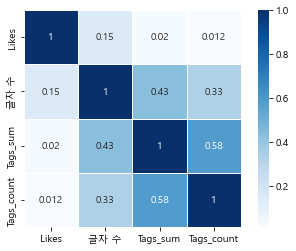

In [253]:
sns.heatmap(corr, square=True, cmap="Blues", linewidths=0.5,annot=True)

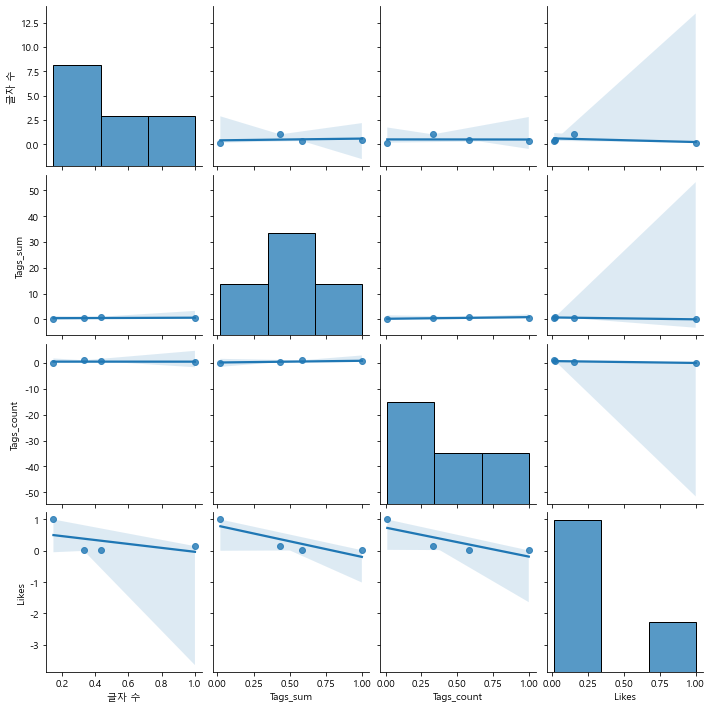

In [225]:
sns.pairplot(corr, kind="reg")

# all category

In [242]:
result_all = result[["Likes", "Contents","Tags_sum", "Tags_count"]]

In [244]:
result_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13323 entries, 0 to 13322
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Likes       13323 non-null  float64
 1   Contents    13323 non-null  object 
 2   Tags_sum    13323 non-null  int64  
 3   Tags_count  13323 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 416.5+ KB


In [245]:
len_list=[]

for i in range(13323):
    len_t=len(result_all["Contents"][i])
    len_list.append(len_t)

In [246]:
result_all["글자 수"]=len_list

C:\Users\acorn\AppData\Local\Temp\ipykernel_41392\2889144183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_all["글자 수"]=len_list


In [247]:
result_all

,Likes,Contents,Tags_sum,Tags_count,글자 수
0,3126.0,내 꿈은 돈모아서 돈까스의집 사는것 한입에 모든걸 뺏겨버린 맛이다 괜히 40년...,6,8.0,377
1,3750.0,구름같은 만두를 맛볼 수 있은 곳이에요 너무 맛있어서 음소거 모드로 흡입했어요 ...,3,1.0,467
2,2761.0,고치돈 좋아하는 국민들 주목 친애하는 국민여러분 먹통령입니다 오늘 저희가 회담을...,8,10.0,634
3,7885.0,다들주목 서울 3대 돈까스 오픈부터 엄청나게 웨이팅이 있는곳벼루다 드뎌...,18,0.0,469
4,317.0,치즈돈까스 집에서만들기 육전용 돈등심으로 미니치즈돈까스를 만들었어요 등심에...,19,8.0,393
...,...,...,...,...,...
13318,95.0,행운버거 행운이 있음 좋겠네 맥도날드 햄버거 행운버거 좋반 먹팔 푸드스타그램 ...,30,4.0,209
13319,16.0,What_the_burger_ph 치킨신메뉴판매중 버거랑 치킨이랑 같이 먹으면...,14,6.0,255
13320,5.0,몬스터신부101번째프로포즈 영화오랜만에 극장나들이 즐겁고 배부른 하루 상봉...,7,2.0,63
13321,13.0,방학을 한 첫찌ㅠ ㅠ 전쟁이 따로없군학교갈때도전쟁이라 생각했는데 방학이 더 전...,14,2.0,271


In [248]:
all_corr=result_all.corr()

<AxesSubplot:>

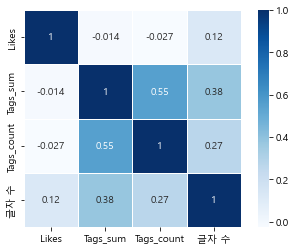

In [249]:
sns.heatmap(all_corr, square=True, cmap="Blues", linewidths=0.5,annot=True)

In [259]:
from konlpy.tag import Okt
from konlpy.corpus import kolaw
import nltk
from wordcloud import WordCloud

In [263]:
a_t=str(result_all["Contents"])

In [265]:
okt=Okt()
tk_ko=okt.nouns(a_t)
print(len(tk_ko))

90


In [266]:
tk_ko

['내',
 '꿈',
 '돈',
 '돈까스',
 '집',
 '입',
 '걸',
 '겨',
 '맛',
 '구름',
 '만두',
 '수',
 '곳',
 '음소거',
 '모드',
 '흡입',
 '고치',
 '돈',
 '국민',
 '주목',
 '국민',
 '여러분',
 '먹통',
 '령',
 '오늘',
 '저희',
 '회담',
 '주목',
 '서울',
 '돈까스',
 '오픈',
 '웨이팅',
 '곳',
 '벼루',
 '드뎌',
 '치즈',
 '돈까스',
 '집',
 '만들기',
 '전용',
 '돈',
 '등심',
 '미니',
 '치즈',
 '돈까스',
 '등심',
 '행운',
 '버거',
 '행운',
 '맥도날드',
 '햄버거',
 '행운',
 '버거',
 '반',
 '팔',
 '푸드',
 '스타',
 '그램',
 '치킨',
 '메뉴',
 '판매',
 '버거',
 '치킨',
 '몬스터',
 '신부',
 '번',
 '프로포즈',
 '영화',
 '만',
 '극장',
 '나들이',
 '하루',
 '상봉',
 '방학',
 '찌',
 '전쟁',
 '학교',
 '때',
 '전쟁',
 '생각',
 '방학',
 '더',
 '전',
 '감기',
 '낫',
 '오늘',
 '병원',
 '저',
 '증세',
 '좀']

In [275]:
okt.nouns(str(result_all["Contents"]))

['내',
 '꿈',
 '돈',
 '돈까스',
 '집',
 '입',
 '걸',
 '겨',
 '맛',
 '구름',
 '만두',
 '수',
 '곳',
 '음소거',
 '모드',
 '흡입',
 '고치',
 '돈',
 '국민',
 '주목',
 '국민',
 '여러분',
 '먹통',
 '령',
 '오늘',
 '저희',
 '회담',
 '주목',
 '서울',
 '돈까스',
 '오픈',
 '웨이팅',
 '곳',
 '벼루',
 '드뎌',
 '치즈',
 '돈까스',
 '집',
 '만들기',
 '전용',
 '돈',
 '등심',
 '미니',
 '치즈',
 '돈까스',
 '등심',
 '행운',
 '버거',
 '행운',
 '맥도날드',
 '햄버거',
 '행운',
 '버거',
 '반',
 '팔',
 '푸드',
 '스타',
 '그램',
 '치킨',
 '메뉴',
 '판매',
 '버거',
 '치킨',
 '몬스터',
 '신부',
 '번',
 '프로포즈',
 '영화',
 '만',
 '극장',
 '나들이',
 '하루',
 '상봉',
 '방학',
 '찌',
 '전쟁',
 '학교',
 '때',
 '전쟁',
 '생각',
 '방학',
 '더',
 '전',
 '감기',
 '낫',
 '오늘',
 '병원',
 '저',
 '증세',
 '좀']

In [276]:
#### 불용어 처리

stop_words = ["좀","저","오늘","병원","증세","때","국민","구름","저희"]

tk_ko= [each_word for each_word in tk_ko if each_word not in stop_words]
print(len(tk_ko))

79


In [331]:
r

,Likes,Contents,Tags_sum,Tags_count,글자 수
0,3126.0,내 꿈은 돈모아서 돈까스의집 사는것 한입에 모든걸 뺏겨버린 맛이다 괜히 40년...,6,8.0,377
1,3750.0,구름같은 만두를 맛볼 수 있은 곳이에요 너무 맛있어서 음소거 모드로 흡입했어요 ...,3,1.0,467
2,2761.0,고치돈 좋아하는 국민들 주목 친애하는 국민여러분 먹통령입니다 오늘 저희가 회담을...,8,10.0,634
3,7885.0,다들주목 서울 3대 돈까스 오픈부터 엄청나게 웨이팅이 있는곳벼루다 드뎌...,18,0.0,469
4,317.0,치즈돈까스 집에서만들기 육전용 돈등심으로 미니치즈돈까스를 만들었어요 등심에...,19,8.0,393
...,...,...,...,...,...
13318,95.0,행운버거 행운이 있음 좋겠네 맥도날드 햄버거 행운버거 좋반 먹팔 푸드스타그램 ...,30,4.0,209
13319,16.0,What_the_burger_ph 치킨신메뉴판매중 버거랑 치킨이랑 같이 먹으면...,14,6.0,255
13320,5.0,몬스터신부101번째프로포즈 영화오랜만에 극장나들이 즐겁고 배부른 하루 상봉...,7,2.0,63
13321,13.0,방학을 한 첫찌ㅠ ㅠ 전쟁이 따로없군학교갈때도전쟁이라 생각했는데 방학이 더 전...,14,2.0,271


# 치킨 HEATMAP

In [352]:
chicken = result[result["Category"]=="치킨"]

In [353]:
# 결측치 확인
chicken.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1995 entries, 5997 to 7991
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      1995 non-null   object 
 1   ID            1995 non-null   object 
 2   Contents      1995 non-null   object 
 3   Tags          1995 non-null   object 
 4   Tags_sum      1995 non-null   int64  
 5   Tags_count    1995 non-null   float64
 6   Tags_rate     1995 non-null   float64
 7   Likes         1995 non-null   float64
 8   Scaled_likes  1994 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 155.9+ KB


In [364]:
chicken=chicken.fillna(0)

In [369]:
chicken

,Category,ID,Contents,Tags,Tags_sum,Tags_count,Tags_rate,Likes,Scaled_likes
5997,치킨,z.e.o.m,둥근해 대신 올해는 동근 해가 떴습니다 우동사리에 치밥까지 치킨으로 풀코스 즐기...,"#동근이숯불두마리치킨, #동근이숯불두마리치킨, #치킨, #치킨맛집, #배달치킨, #...",11,12.0,109.09,1040.0,0.175646
5998,치킨,foodgangster_fgg,협찬 떡볶이에 타피오카 펄 쏟은 줄 알았다 버블티같은 떡볶이다 맥주를 부르는...,"#치킨매니아, #푸드갱_배달, #배달맛집, #치킨맛집, #떡볶이맛집, #배달음식추천...",9,8.0,88.89,109.0,0.018409
5999,치킨,bboong_bbang_2,돼지 사료 일지 506 지코바 성정점뿡빵쓰가 스트레스 받으면 주기적 수혈하는 ...,,0,0.0,0.00,109.0,0.018409
6000,치킨,dhrkspths,얼마나 맛있었으면 포장까지ㄷㄷㄷ 범맥주 임,,0,0.0,0.00,9.0,0.001520
6001,치킨,a_a_bl0s2om,노랑통닭ㆍㆍㆍ 대구맛집 먹방 instafood 요리스타그램 요리 맛스타...,"#대구맛집, #먹방, #instafood, #요리스타그램, #요리, #맛스타그램, ...",28,6.0,21.43,19.0,0.003209
...,...,...,...,...,...,...,...,...,...
7987,치킨,lee_hk79,논어 공부가되는논어이야기 방학독서 책읽기습관 책스타그램 책추천 아이들과함께...,"#논어, #공부가되는논어이야기, #방학독서, #책읽기습관, #책스타그램, #책추천,...",29,4.0,13.79,41.0,0.006925
7988,치킨,stomach_endoscope,어떻게 라면에 주먹밥이 팔천원,,0,0.0,0.00,74.0,0.012498
7989,치킨,nolgoo,오늘 먹은거솥밥 넘 맛났당윤선빵과 함께 커플스타그램 럽스타그램 먹스타그램 ...,"#커플스타그램, #럽스타그램, #먹스타그램, #솥밥, #도미관자솥밥, #전복솥밥, ...",25,2.0,8.00,21.0,0.003547
7990,치킨,kimtaelee_092,엄마도 외출나가고 동생도 칭구집 가서 나 혼자 혼 치 조지기 빠삭빠삭 잘 튀겨졌...,"#혼치킨??, #혼밥, #치킨매니아, #먹는거에진심인편, #존맛탱구리, #치킨, #...",9,4.0,44.44,11.0,0.001858


In [372]:
len_list=[]

for i in range(5997,7992):
    len_t=len(chicken["Contents"][i])
    len_list.append(len_t)

In [373]:
len(len_list)

1995

In [374]:
chicken["글자 수"]=len_list

In [377]:
chicken.head()

,Category,ID,Contents,Tags,Tags_sum,Tags_count,Tags_rate,Likes,Scaled_likes,글자 수
5997,치킨,z.e.o.m,둥근해 대신 올해는 동근 해가 떴습니다 우동사리에 치밥까지 치킨으로 풀코스 즐기...,"#동근이숯불두마리치킨, #동근이숯불두마리치킨, #치킨, #치킨맛집, #배달치킨, #...",11,12.0,109.09,1040.0,0.175646,477
5998,치킨,foodgangster_fgg,협찬 떡볶이에 타피오카 펄 쏟은 줄 알았다 버블티같은 떡볶이다 맥주를 부르는...,"#치킨매니아, #푸드갱_배달, #배달맛집, #치킨맛집, #떡볶이맛집, #배달음식추천...",9,8.0,88.89,109.0,0.018409,262
5999,치킨,bboong_bbang_2,돼지 사료 일지 506 지코바 성정점뿡빵쓰가 스트레스 받으면 주기적 수혈하는 ...,,0,0.0,0.00,109.0,0.018409,511
6000,치킨,dhrkspths,얼마나 맛있었으면 포장까지ㄷㄷㄷ 범맥주 임,,0,0.0,0.00,9.0,0.001520,26
6001,치킨,a_a_bl0s2om,노랑통닭ㆍㆍㆍ 대구맛집 먹방 instafood 요리스타그램 요리 맛스타...,"#대구맛집, #먹방, #instafood, #요리스타그램, #요리, #맛스타그램, ...",28,6.0,21.43,19.0,0.003209,193


In [383]:
c_c=chicken[["Likes","글자 수", "Tags_sum","Tags_count"]].corr()

<AxesSubplot:>

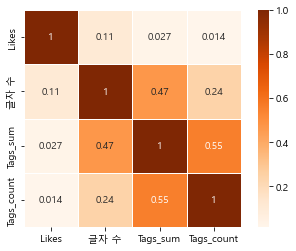

In [387]:
sns.heatmap(c_c, square=True, cmap="Oranges", linewidths=0.5,annot=True)

# 떡볶이 HEATMAP

In [397]:
tt = result[result["Category"]=="떡볶이"]

In [398]:
tt=tt.fillna(0)

tt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1999 to 3998
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      2000 non-null   object 
 1   ID            2000 non-null   object 
 2   Contents      2000 non-null   object 
 3   Tags          2000 non-null   object 
 4   Tags_sum      2000 non-null   int64  
 5   Tags_count    2000 non-null   float64
 6   Tags_rate     2000 non-null   float64
 7   Likes         2000 non-null   float64
 8   Scaled_likes  2000 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 156.2+ KB


In [399]:
tt

,Category,ID,Contents,Tags,Tags_sum,Tags_count,Tags_rate,Likes,Scaled_likes
1999,떡볶이,mae_chelin,서울 5대 떡볶이 중에 한곳인 현선이네 20년전 포장마차에서 시작해서 많은 지...,"#떡볶이, #현선이네, #현선이네떡볶이, #분식, #생맥주, #현선이네본점, #즉석...",23,14.0,60.87,629.0,0.073878
2000,떡볶이,_yamiyomi_,냉장고에 쟁여두고 먹고싶은 빨간 무침군만두 솔직히 여기는 이거 먹으러 가는거죠 이...,"#이수, #애플하우스, #무침만두, #무침군만두, #만두, #양념만두, #분식, #...",11,6.0,54.55,1053.0,0.123679
2001,떡볶이,biteofyommy,대전 디저트 간판이 성심당이라면 떡볶이는 바로그집입니댜 바로그집 ...,"#바로그집, #저장필수, #대전데이트코스, #바로그집, #요미_대전",5,0.0,0.00,1801.0,0.211534
2002,떡볶이,g.yoooong_place,친구 수진 을 태그하면 꼭 사줘야 하는 곳이 있습니다 경기 성남시 수진역 근처에 ...,"#수진분식수진분식은, #떡볶이그, #김말이, #계란기본으로, #플_경기, #...",7,2.0,28.57,1403.0,0.164787
2003,떡볶이,mukpresident,쌀떡볶이파 국민 주목친애하는 국민여러분 먹통령입니다 오늘 저희가 회담을 나눌 곳...,"#홍반장떡볶이, #먹통령_신림, #신림맛집, #신림역맛집, #서울대입구맛집, #쌀떡...",11,15.0,136.36,2633.0,0.309255
...,...,...,...,...,...,...,...,...,...
3994,떡볶이,yulm___jinhyn,2022 01 08 메뉴 두끼떡볶이 두끼를 좋아하지만 떡볶이한판은 다못먹고날...,"#떡볶이한판은, #다못먹고날, #어묵꼬치10개를, #해맑게먹는상당히, #너, #귀여...",19,11.0,57.89,15.0,0.001762
3995,떡볶이,i_ate_it__,금촌 맛집 ok분식 엄청 달달쓰한 덕복희 이날은 떡이 덜익어서 턱이 아팠음ㅠ,#ok분식,1,1.0,100.00,17.0,0.001997
3996,떡볶이,actresshanna,밀키트 5종 공구 오픈 했어요 프로필에 링크로 가시면 구매 가능하세요하루에 ...,"#사대부집곳간, #공동구매, #공구, #밀키트, #집밥, #맛집, #밀키트추천, #...",30,6.0,20.00,22.0,0.002584
3997,떡볶이,yulm___jinhyn,2022 01 07 메뉴 차돌불떡 배고파서 정신없이 먹다가 찍은건 볶음밥뿐불떡...,"#볶음밥뿐불떡은, #불고기일까, #떡볶이일까난, #그럼떡볶이지-, #이대역, #산타...",15,8.0,53.33,8.0,0.000940


In [402]:
len_list=[]

for i in range(1999,3999):
    len_t=len(tt["Contents"][i])
    len_list.append(len_t)

In [406]:
tt["글자 수"]=len_list

In [407]:
tt

,Category,ID,Contents,Tags,Tags_sum,Tags_count,Tags_rate,Likes,Scaled_likes,글자 수
1999,떡볶이,mae_chelin,서울 5대 떡볶이 중에 한곳인 현선이네 20년전 포장마차에서 시작해서 많은 지...,"#떡볶이, #현선이네, #현선이네떡볶이, #분식, #생맥주, #현선이네본점, #즉석...",23,14.0,60.87,629.0,0.073878,498
2000,떡볶이,_yamiyomi_,냉장고에 쟁여두고 먹고싶은 빨간 무침군만두 솔직히 여기는 이거 먹으러 가는거죠 이...,"#이수, #애플하우스, #무침만두, #무침군만두, #만두, #양념만두, #분식, #...",11,6.0,54.55,1053.0,0.123679,545
2001,떡볶이,biteofyommy,대전 디저트 간판이 성심당이라면 떡볶이는 바로그집입니댜 바로그집 ...,"#바로그집, #저장필수, #대전데이트코스, #바로그집, #요미_대전",5,0.0,0.00,1801.0,0.211534,439
2002,떡볶이,g.yoooong_place,친구 수진 을 태그하면 꼭 사줘야 하는 곳이 있습니다 경기 성남시 수진역 근처에 ...,"#수진분식수진분식은, #떡볶이그, #김말이, #계란기본으로, #플_경기, #...",7,2.0,28.57,1403.0,0.164787,705
2003,떡볶이,mukpresident,쌀떡볶이파 국민 주목친애하는 국민여러분 먹통령입니다 오늘 저희가 회담을 나눌 곳...,"#홍반장떡볶이, #먹통령_신림, #신림맛집, #신림역맛집, #서울대입구맛집, #쌀떡...",11,15.0,136.36,2633.0,0.309255,704
...,...,...,...,...,...,...,...,...,...,...
3994,떡볶이,yulm___jinhyn,2022 01 08 메뉴 두끼떡볶이 두끼를 좋아하지만 떡볶이한판은 다못먹고날...,"#떡볶이한판은, #다못먹고날, #어묵꼬치10개를, #해맑게먹는상당히, #너, #귀여...",19,11.0,57.89,15.0,0.001762,170
3995,떡볶이,i_ate_it__,금촌 맛집 ok분식 엄청 달달쓰한 덕복희 이날은 떡이 덜익어서 턱이 아팠음ㅠ,#ok분식,1,1.0,100.00,17.0,0.001997,46
3996,떡볶이,actresshanna,밀키트 5종 공구 오픈 했어요 프로필에 링크로 가시면 구매 가능하세요하루에 ...,"#사대부집곳간, #공동구매, #공구, #밀키트, #집밥, #맛집, #밀키트추천, #...",30,6.0,20.00,22.0,0.002584,1144
3997,떡볶이,yulm___jinhyn,2022 01 07 메뉴 차돌불떡 배고파서 정신없이 먹다가 찍은건 볶음밥뿐불떡...,"#볶음밥뿐불떡은, #불고기일까, #떡볶이일까난, #그럼떡볶이지-, #이대역, #산타...",15,8.0,53.33,8.0,0.000940,143


<AxesSubplot:>

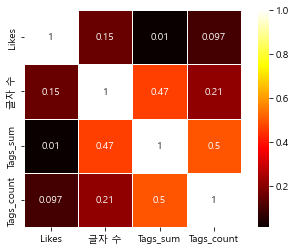

In [413]:
t_c=tt[["Likes","글자 수", "Tags_sum","Tags_count"]].corr()

sns.heatmap(t_c, square=True, cmap="hot", linewidths=0.5,annot=True)